<a href="https://colab.research.google.com/github/holabayor/Hamoye-Internship-Workbook/blob/main/Hamoye_Internship_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_df = pd.read_csv('/content/drive/MyDrive/Hamoye/Data_for_UCI_named.csv')
data_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


The data has 12 primary predictive features and two dependent variables.

Predictive features:

**'tau1'** to **'tau4'**: the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);

**'p1'** to **'p4'**: nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);

**'g1'** to **'g4'**: price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');
Dependent variables:

**'stab'**: the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
'stabf': a categorical (binary) label ('stable' or 'unstable').

> Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).

Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test). Use scikit learn to train a random forest and extra trees classifier. And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Use random_state = 1 for training all models and evaluate on the test set. Answer the following questions:

In [3]:
data_df.shape

(10000, 14)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


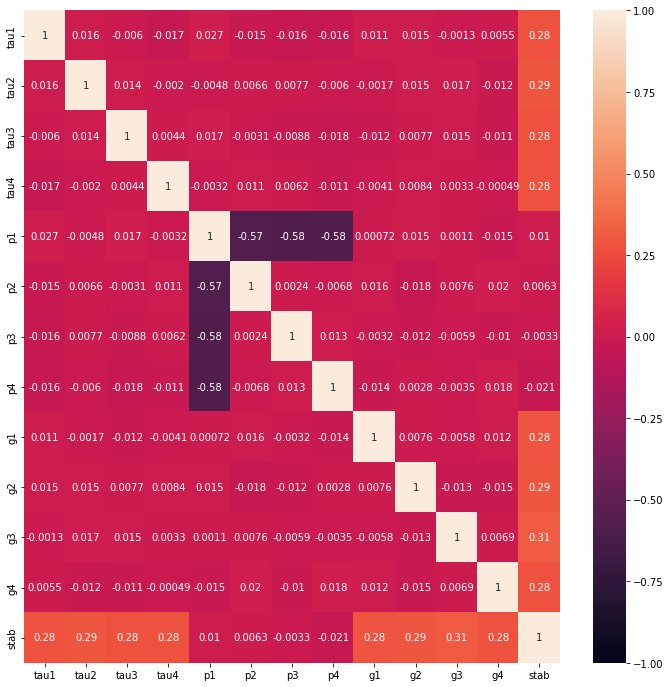

In [5]:
plt.figure(figsize=(12, 12))
sns.heatmap(data_df.corr(), annot = True, vmin=-1, vmax=1)
plt.show()


In [6]:
# According to the instructions
# We will drop stab because of its direct relationship with stabf

data = data_df.drop('stab', axis = 1)

In [7]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [8]:
features = data.drop('stabf', axis = 1)
y = data['stabf']

# Then, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalised_data = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
X = normalised_data

In [9]:
#Now, we split our dataset into the training and testing dataset. Recall that we
#had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Train our models**

In [ ]:
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,-0.835374,-0.791317,1.141704,1.652103,0.017397,1.079405,-0.017078,-1.092545,0.457467,1.220013,1.321628,1.579026
1,1.478297,-0.126705,-0.803111,-1.415043,1.752124,-1.593619,-1.438158,-0.011575,-0.406791,1.230354,0.135424,0.936256
2,1.357093,1.312140,-0.803499,-1.471504,-0.458492,0.098253,-0.062840,0.760963,-1.319852,0.881299,1.146596,-1.513802
3,-1.653138,0.882289,-0.278354,-1.060901,0.284250,0.513904,-1.591046,0.583414,-0.287304,1.647250,1.474543,-0.591750
4,-0.771543,0.860108,-0.111670,1.680114,-0.298075,0.287450,-1.376343,1.606636,0.992226,-0.253610,0.481133,1.079063


Random Forest Classifi
ers

In [10]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

# Create a Random forest Classifier
rf = RandomForestClassifier()
 
# Train the model using the training sets
rf.fit(X_train, y_train)

y_preds_rf = rf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds_rf)

0.924

Extra Trees Classifier

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()

etc.fit(X_train, y_train)

y_preds = etc.predict(X_test)

accuracy_score(y_test, y_preds)

0.928

In [13]:
# Computing the importance of each feature
feature_importance = etc.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in etc.estimators_], axis = 0)

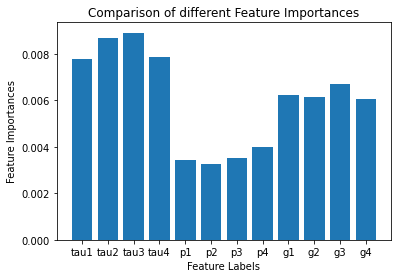

In [14]:
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [33]:
etc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [37]:
# Use RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

parameters = {'max_depth': range(20), 'n_estimators' : range(100, 400, 50)}

randomized_etc = RandomizedSearchCV(etc, param_distributions=parameters, random_state=0)

randomized_etc.fit(X_train, y_train)

randomized_etc.best_params_
randomized_etc.best_score_

0.9258749999999999

XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

xgb_preds = xgb.predict(X_test)

In [ ]:
accuracy_score(y_test, xgb_preds)

0.9195

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

xgb_preds = xgb.predict(X_test)

In [ ]:
# build the lightgbm model
import lightgbm as lgb

lgbclassifier = lgb.LGBMClassifier()

lgbclassifier.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
lgbclassifier.fit(X_train, y_train)

lgb_preds = lgbclassifier.predict(X_test)

In [ ]:
accuracy_score(y_preds, lgb_preds)

0.9475